In [1]:
# Import all Coxeter diagram functions and utilities
from isometry_utils import *

G = E8.genus()
G.representatives()

TypeError: unable to start magma because the command 'magma -n' failed: The command was not found or was not executable: magma.


In [ ]:
As = [A1, ..., A20]
Ds = [D2, ..., D20]
Es = [E6, E7, E8]

As2 = [x.twist(2) for x in As]
Ds2 = [x.twist(2) for x in Ds]
Es2 = [x.twist(2) for x in Es]

n = 20 + 1
IPQs = [IPQ(p, q) for p in range(n) for q in range(n) if not (p == 0 and q == 0)]
IIPQs = [
    IIPQ(p, q)
    for p in range(n)
    for q in range(n)
    if not (p == 0 and q == 0) and p - q % 8 == 0
]

IPQs2 = [x.twist(2) for x in IPQs]
IIPQs2 = [x.twist(2) for x in IIPQs]

AllLats = As + Ds + Es + As2 + Ds2 + Es2 + IPQs + IIPQs + IPQs2 + IIPQs2
len(AllLats)

In [ ]:
from collections import defaultdict

lat_lookup = defaultdict(list)

for L in AllLats:
    (p, q) = L.signature_pair()
    lat_lookup[(p, q)].append(L)

sigs = Set(lat_lookup.keys())
sigs[0:10]

In [ ]:
p = 3
q = 5

print(len(sigs))
ok_sigs = list(filter(lambda x: x[0] <= p and x[1] <= q and x[0] + x[1] <= p + q, sigs))
print(len(ok_sigs))


def sumset(s):
    return reduce(lambda x, y: (x[0] + y[0], x[1] + y[1]), s)


sub_sigs = Subsets(ok_sigs)
print(sub_sigs.cardinality().factor())

correct_sigs = [s for s in sub_sigs if not s.is_empty() and sumset(s) == (p, q)]

Set(correct_sigs).cardinality().factor()

In [ ]:
L = A1.twist(-2) ** 3 @ D5
L
# Set(correct_sigs).cardinality().factor()

In [ ]:
correct_sigs

In [ ]:
# for sigs in correct_sigs[0:5]:
#     all_possibilities = list( itertools.product( *[ lat_lookup[sig] for sig in sigs] ) )
#     for s in all_possibilities:
#         L_pos = reduce( lambda a,b: a.direct_sum(b), s )
#         if L_pos.is_isometric(L):
#             print("Found isometry: ")
#             show(L)
#             break

In [ ]:
# All analysis functions and CoxeterGraph class are now imported from isometry_utils.py
# This includes: is_elliptic_matrix, is_parabolic_matrix, is_elliptic_subgraph,
# is_parabolic_subgraph, init_coxeter_colors, get_coxeter_label_connected,
# CoxeterGraph class with all methods (including to_tikz_labeled), m_lookup table, etc.


In [1]:
# All Dynkin diagram and Coxeter graph functions are now imported from isometry_utils.py
# This includes: matrix_to_graph, graph_to_matrix, all A/B/C/D/E/F/G/H type functions,
# affine types (tilde functions), classification functions, and the CoxeterGraph class

In [ ]:
# All analysis functions and CoxeterGraph class are now imported from isometry_utils.py
# This includes: is_elliptic_matrix, is_parabolic_matrix, is_elliptic_subgraph,
# is_parabolic_subgraph, init_coxeter_colors, get_coxeter_label_connected,
# CoxeterGraph class with all methods (including to_tikz_labeled), m_lookup table, etc.


# [(m, cos(pi/(m+2))) for m in [0..10]]
# gij -> m
m_lookup = {
    0: 2,
    1 / 2: 3,
    1 / sqrt(2): 4,
    sqrt(3) / 2: 6,
    1: Infinity,
}

# Subsets have  X.lattice()                                                           # needs sage.combinat sage.graphs+

In [ ]:
show([TEn.q(x) for x in sterks2])


In [ ]:
G = TEn.gram_matrix()
Ginv = G.inverse()

e, f, ep, fp, a1, a2, a3, a4, a5, a6, a7, a8 = TEn.basis()
ed, fd, epd, fpd, a1d, a2d, a3d, a4d, a5d, a6d, a7d, a8d = (2 * Ginv).columns()

a9 = fp - ep
a10 = a8d + 2 * ep
a11 = 2 * ep + 2 * fp + a1d + a8d
a12 = a12 = 5 * ep + 3 * fp + 2 * a2d
sterks1 = [a1, a3, a4, a5, a6, a7, a8, a11, a10, a9, a12, a2]

# a9 = a8d + 2*f
# a10 = e-f
# sterks2 = [a1, ..., a10]

M = TEn.sub_gram_matrix(sterks1)

s1_pos = {
    0: [0, 0],
    1: [4, 0],
    2: [8, 0],
    3: [8, -4],
    4: [8, -8],
    5: [4, -8],
    6: [0, -8],
    7: [0, -4],
    8: [2, -6],
    9: [3.25, -4.75],
    10: [4.5, -3.5],
    11: [6, -2],
}

s2_pos = {
    0: [0, 0],
    2: [-4, 0],
    3: [-8, 0],
    4: [-7, 4],
    5: [-6, 8],
    6: [-5, 12],
    7: [-4, 16],
    8: [-3, 20],
    9: [-2, 24],
    1: [-2, 6],
}

G2 = CoxeterGraph(
    TEn.sub_gram_matrix(sterks2),
    pos=s2_pos,
    tex_title="Sterk 2",
    tikz_options={
        "scale": 1,
        "graphviz_scale": 0.2,
        "graphviz_width": 0.15,
        "scale_factor": 50,
        "scale_factor_labels": 50,
        "fontsize": 30,
        "tex_font_size": "Large",
        "edge_width": 1.2,
        "node_size": "0.5cm",
    },
)

G1 = CoxeterGraph(
    TEn.sub_gram_matrix(sterks1),
    pos=s1_pos,
    tex_title="Sterk 1",
    tikz_options={
        "scale": 2,
        "graphviz_scale": 0.2,
        "graphviz_width": 0.15,
        "scale_factor": 50,
        "scale_factor_labels": 53,
        "fontsize": 22,
        "tex_font_size": "tiny",
        "edge_width": 1.2,
        "node_size": "0.5cm",
    },
)


subgraphs = G1.orbits_of_subgraphs(representatives_only=True)
show(len(subgraphs))

# ell_subgraphs = G1.orbits_of_elliptic_subgraphs(fast=False)
# show(len(ell_subgraphs))

parab_subgraphs = G1.get_parabolic_subgraphs()
show(len(parab_subgraphs))

parab_subgraph_orbits = G1.orbits_of_parabolic_subgraphs()
show(len(parab_subgraph_orbits))

# show( G1.plot() )
# show( G2.plot() )

In [ ]:
print(all([is_elliptic_matrix(H.gram_matrix) for H in G1.get_elliptic_subgraphs()]))
print(all([is_parabolic_matrix(H.gram_matrix) for H in G1.get_parabolic_subgraphs()]))
print(
    all(
        [is_parabolic_matrix(H.gram_matrix) for H in G1.orbits_of_parabolic_subgraphs()]
    )
)

In [ ]:
# H = G1.get_random_subgraph(graph_type="Parabolic")
show(H.plot())
# print( H.to_dotfile() )

# H.gram_matrix
# for i in [1..30]:
#     show( G1.get_random_subgraph(graph_type="Elliptic").plot() )
is_parabolic_matrix(H.gram_matrix)
show(H.connected_components())

M1 = G1.subgraph([0, 1, 2, 3, 4, 5, 7]).gram_matrix
M2 = G1.subgraph([9, 10]).gram_matrix
print(M1)
print(M2)
print(is_parabolic_matrix(M1))
print(is_parabolic_matrix(M2))
print(M1.is_singular())
print(M2.is_singular())

# Degenerate and every component is PSD
# Degenerate and every subdiagram is elliptic

In [ ]:
H = G1.subgraph([0, 1, 2, 7, 11, 8, 5, 4])
# G1.to_tikz_labeled(subgraph=H, tikz_options = {
#         "scale": 2,
#         "graphviz_scale": 0.2,
#         "graphviz_width": 0.15,
#         "scale_factor": 50,
#         "scale_factor_labels": 53,
#         "fontsize": 2,
#         "tex_font_size": "tiny",
#         "edge_width": 1.2,
#         "node_size": "0.5cm",
#     })

G1.plot(subgraph=H)

ells = list(reversed(sorted(ell_subgraphs.maximal_elements(), key=len)))
H = ells[0]
G1.plot(subgraph=H)  # .save(f'S1_H{i}.png')

In [ ]:
s = ""
ells = list(reversed(sorted(ell_subgraphs.maximal_elements(), key=len)))
for i, H in enumerate(ells):
    G1.plot(subgraph=H).save(f"S1_H{i}.png")
    s += f"""
\\begin{{minipage}}[c]{{0.25\\textwidth}}
\\includegraphics[width=\\textwidth]{{S1_H{i}.png}}
\\end{{minipage}}
    """.rstrip()
    if (i + 1) % 4 == 0:
        s += "\n\\vspace{1em}\n"

print(s)

![](./S1_H0.png) ![](./S1_H1.png) ![](./S1_H2.png) ![](./S1_H3.png) ![](./S1_H4.png) ![](./S1_H5.png) ![](./S1_H6.png) ![](./S1_H7.png) ![](./S1_H8.png) ![](./S1_H9.png) ![](./S1_H10.png) ![](./S1_H11.png) ![](./S1_H12.png) ![](./S1_H13.png) ![](./S1_H14.png) ![](./S1_H15.png) ![](./S1_H16.png) ![](./S1_H17.png) ![](./S1_H18.png) ![](./S1_H19.png) ![](./S1_H20.png) 


In [ ]:
subgraphs = G.orbits_of_subgraphs(representatives_only=True)
subgraphs
nontrivial_subgraphs = [H for H in subgraphs if len(H) > 0]
elliptic_subgraphs = filter(lambda H: is_elliptic_subgraph(H), nontrivial_subgraphs)
only_connected = False
if only_connected:
    elliptic_subgraphs = filter(lambda H: H.is_connected(), elliptic_subgraphs)

fast = False
if fast:
    elliptic_subgraphs = lmap(lambda H: Set(H.vertices()), elliptic_subgraphs)
    B = Poset((elliptic_subgraphs, lambda h0, h1: h0.issubset(h1)))
else:
    B = Poset(
        (
            set(elliptic_subgraphs),
            lambda x, y: all([v in y.vertices() for v in x.vertices()]),
        )
    )
B.cardinality()
B

In [ ]:
elliptic_subgraphs = filter(lambda H: is_elliptic_subgraph(H), nontrivial_subgraphs)
elliptic_subgraphs = lmap(lambda H: Set(H.vertices()), elliptic_subgraphs)
h0 = elliptic_subgraphs[0]
h1 = elliptic_subgraphs[1]

h0.issubset(h1)

In [ ]:
Hp = CoxeterSubgraph(H)

subgraphs = G.orbits_of_subgraphs(representatives_only=True)

nontrivial_subgraphs = [H for H in subgraphs if len(H) > 0]
elliptic_subgraphs = filter(lambda H: is_elliptic_subgraph(H), nontrivial_subgraphs)

els = lmap(lambda H: H, elliptic_subgraphs)

print(len(els))


def compare_subgraphs(x, y):
    return Set(x.vertices()).issubset(Set(y.vertices())) and Set(x.edges()).issubset(
        Set(y.edges())
    )


B = Poset((set(els), compare_subgraphs))
B
# hash(Hp)
# frozenset( H.edges() ).union( frozenset( H.vertices() ) )
# hash( frozenset( H.edges() ) )
# hash( lmap(lambda s: str(s), list(H.edges()) ) )

In [ ]:
?Poset

In [ ]:
print(H.to_dotfile())

In [ ]:
subgraphs = G.get_subgraphs()
AutG = G.automorphism_group()
int_orbits = set()
for H in subgraphs:
    orb = AutG.orbit(tuple(H.vertices()), action="OnSets")
    lp = sorted([tuple(sorted(l)) for l in orb])
    int_orbits.add(tuple(lp))

# int_orbits.
# graph_orbits = set()
# for some_orbs in int_orbits:
#     # selg.subgraph(x).copy(immutable=True)
#     # Orbit calculation needs immutable objects => hashable
#     ls = lmap( lambda x: self.subgraph(x), some_orbs)
#     graph_orbits.add(tuple(ls))
# [x[0]for x in graph_orbits]


graph_orbits = Set(
    [tuple(map(lambda x: G.subgraph(x), some_orbs)) for some_orbs in int_orbits]
)
print(graph_orbits.cardinality())

reps = [x[0] for x in graph_orbits]
len(reps)

In [ ]:
G._default_options["vertex_colors"]
# show( G._default_options )
# show( G.gram_matrix )
# show( init_coxeter_colors(G) )
H = G.subgraph([1, 2, 3, 6, 9])
# G.pos
# G._default_options["vertex_colors"]
H.plot()
# show( init_coxeter_colors(H) )
# Hp.vertices()
# Hl = H.graphplot(save_pos=True)
# Hl.set_pos(pos=pos_dict)
# G.get_pos()
# print(pos_dict)
# subs_pos_dict = {x:pos_dict[x] for x in pos_dict if x in H.vertices()}
# show( Hp.plot(pos=subs_pos_dict, vertex_colors = G._default_options["vertex_colors"]) )

# show( H.vertices() )
# d = {'#FF0000': [1,2,3,6], '#FF9900': [9], '#FFFF00': [],
#       '#00FF00': [], '#0000FF': []}

# vcs = G._default_options["vertex_colors"]

H._default_options

# d = {}
# for x in vcs:
#     k = vcs[x]
#     A = Set( H.vertices() )
#     B = Set( vcs[x] )
#     C = A.intersection(B)
#     d[x] = list(C)

# show(d)
# Hp.plot(vertex_colors = d)
# #show( init_coxeter_colors(H) )

In [ ]:
Set(H.vertices())

{x: vcs[x] for x in vcs}

d = {}
for x in vcs:
    k = vcs[x]
    A = Set(H.vertices())
    B = Set(vcs[x])
    C = A.intersection(B)
    d[x] = list(C)

d

# vcs = G._default_options["vertex_colors"]
# {x: vcs[x] for x in vcs if not Set( H.vertices()).intersection( Set(vcs[x]) ).is_empty()  }

In [ ]:
S = Set([1, 2])
T = Set([2, 3])
S.intersection(T).is_empty()

# {x:pos_dict[x] for x in pos_dict if x in H.vertices()}

In [ ]:
Gp = G.graphplot()
pos_dict = G.graphplot()._pos
pos_dict

In [ ]:
import random

H = random.choice(ell_subgraphs)
H = G.subgraph([1, 2, 3, 6, 9])
H.plot()
# H.plot()

In [ ]:
# H.vertices()
Gp = G.graphplot()
Gp._pos
# H.edges()
# H.plot(title="ASdsa")

In [ ]:
# subgraphs
# sg = ell_subgraphs[5]
# sg.plot()
# sg.plot()
# G.plot()

sgp = G.subgraph([3, 2, 0, 10, 7])
sp = CoxeterGraph(sgp)


Gp = Graph(multiedges=True)

for e in [e for e in sg.edges() if e[0] != e[1]]:
    v1 = e[0]
    v2 = e[1]
    v1_v2 = e[2]
    v1_2 = [e for e in sg.edges_incident(v1) if e[0] == v1 and e[1] == v1][0][2]
    v2_2 = [e for e in sg.edges_incident(v2) if e[0] == v2 and e[1] == v2][0][2]
    # print(f' {v1}({v1_2}) ---- {v1_v2} ---- {v2}({v2_2}) ')
    g12 = int(v1_v2) / sqrt(int(v1_2) * int(v2_2))
    if g12 > 1:
        # print(f'Dotted Edge labeled {g12}')
        Gp.add_edge(v1, v2, g12)
    elif g12 == 1:
        # print(f'm = {m_lookup[g12]}')
        # print("Thick/Infinite Edge")
        Gp.add_edge(v1, v2, "∞")
    elif g12 < 1:
        # print(g12)
        # g12_p = cos(g12)
        # print(g12_p)
        # m = ( pi / arccos( g12) ) -2
        m = m_lookup[g12]
        # print(f'm = {int( m_lookup[g12] )}')
        # print(f'{m}-fold edge')
        for i in range(m - 2):
            Gp.add_edge(v1, v2, "")
    else:
        raise ValueError("Unknown entry.")

pl = Gp.plot()
pl.show(figsize=10)

In [ ]:
type(sgp)
# sgp.plot()
# ell_subgraphs_as_verts = [Set(x.vertices()) for x in ell_subgraphs]
# B = Poset((ell_subgraphs_as_verts, lambda x,y: x.issubset(y)))
# show( len( B.maximal_elements() ) )

# B = Poset(
#     (ell_subgraphs, lambda x,y:
#      Set( x.vertices() ).issubset( Set(y.vertices() ) ) and
#      Set( x.edges() ).issubset( Set(y.edges() ) )
#     )
# )
# len( B.maximal_elements() )

# B

In [ ]:
b = B[200]

d = dict(lmap(lambda H: (H, H.vertices()), B.order_filter([b])))
P = B.subposet(B.order_filter([b]))
P.plot(element_labels=d)

In [ ]:
B.zeta_polynomial()

In [ ]:
l1 = G.subgraph([6, 7, 8, 9])
l2 = G.subgraph([7, 8, 9])
# l1 = ell_subgraphs[35]
# l2 = [x for x in subgraphs if Set(x.vertices()).issubset( Set(l1.vertices())) ][1]

show(l1.vertices())
show(l2.vertices())


show(Set(l2.vertices()).issubset(Set(l1.vertices())))

# show(l1)
# print("------------")
# show(l2)

show(Set(l2.edges()).issubset(Set(l1.edges())))

# all([l1.is_subgraph(x) for x in ell_subgraphs])

# lp = G.subgraph(ell_subgraphs[35].vertices())

# l1.plot(vertex_colors=None, edge_labels=True)
show(l1.old_plot().plot())
# G.underlying_graph

In [ ]:
show(l2.edges())
show(G.edges())

In [ ]:
print(ell_subgraphs[5].vertices())

l1 = Set(ell_subgraphs[5].vertices())
Set([0, 1, 2]).issubset(l1)
show(l1)

l2 = [Set(x.vertices()) for x in ell_subgraphs if Set(x).issubset(l1)][5]
show(l2)
# ell_subgraphs[40].vertices()
# G.num_verts()

# ell_subgraphs_as_verts = lmap(lambda x: tuple(x.vertices()), ell_subgraphs)[0:10]
# ell_subgraphs_as_verts
G = [l1, l2]
show(G)

In [ ]:
S = Subsets([1,..,5])
G = [t for t in S if sum(t)<=3]
show(S)
show(G)
#Poset((G, lambda x,y: x.issubset(y)))

In [ ]:
# B = posets.BooleanLattice(G.num_verts(), )
B = Poset(([l1, l2], lambda x, y: x.issubset(y)))
B.maximal_elements()

In [ ]:
nontrivial_subgraphs
# g=libgap.SymmetricGroup(7)
# n = G.num_verts()
# g.Orbits(tuples([1..n]), libgap.OnTuples)
# Subsets([1..n])
# G = libgap.SymmetricGroup(4)
# ss = Subsets([1,2,3,4])
# show(len(ss))

# G.plot()

# nontrivial_subgraphs = [H for H in subgraphs if len(H) > 0]
# elliptic_subgraphs = filter(lambda H: is_elliptic_subgraph(H), nontrivial_subgraphs)
# list(reversed(sorted(elliptic_subgraphs, key=len)))
# ?AutG.orbits(, OnSetsSets)


# sgs = G.get_subgraphs(only_connected = True, limit=10)
AutG = G.automorphism_group()

# table([(g, im(g)) for g in G])
T1 = libgap.Group(AutG.gens())
# T2 = libgap.Group(map(libgap, AutG.gens()))

T2 = libgap.Group(lmap(libgap, AutG.gens()))

# T1.order()
T2.Order()

# orbs = G.orbits_of_subgraphs()

# show(len(G.orbits_of_elliptic_subgraphs()))
# show(len(orbs))
# orbs

# Orbit(H,Set([Set([G.1,G.1*G.2]),Set([G.1,G.2])]),OnSetsSets); works –


# gfs = G.get_subgraphs()
# factor( len(gfs) )

# orbs = libgap.Orbit( G, sg, action = "OnSetsSets" )

# AutG.orbit(gfs, action = "OnSetSets")

# len(orbs)
# orbs
# g = libgap.Group( (1,2,3), (2,3,4) );;
# libgap.Orbit( g, [ [ 1, 2 ], [ 3, 4 ] ], OnSetsSets );

# orbits = set()

# gfs = G.get_subgraphs(limit=10)

# for H in gfs:
#     orb = AutG.orbit( tuple(H.vertices() ), action = "OnSets")
#     lp = sorted( [ tuple( sorted(l) ) for l in orb] )
#     orbits.add(tuple( lp ))

# print(len(gfs))
# print(len(orbits))
# [x[0] for x in orbits]

In [ ]:
for x in orbits:
    print(x)
    print("-----")

In [ ]:
L = TEn
G = TEn.gram_matrix()
Ginv = G.inverse()

(
    e,
    f,
    ep,
    fp,
    a1,
    a2,
    a3,
    a4,
    a5,
    a6,
    a7,
    a8,
) = TEn.basis()

te = e + ep + fp - a1
tf = f + ep + fp - a1

ta1 = ep - fp
ta2 = a2
ta3 = fp + a3
ta4 = a4
ta5 = a5
ta6 = a6
ta7 = a7
ta8 = a8

ted, tfd, ta1d, ta2d, ta3d, ta4d, ta5d, ta6d, ta7d, ta8d = (
    L.sub_gram_matrix([te, tf, ta1, ta2, ta3, ta4, ta5, ta6, ta7, ta8])
    .inverse()
    .columns()
)

a9 = 2 * te - ta1
a10 = 2 * te + 2 * (ta2d - ta3d)
a11 = tf - te
a12 = ed + fd + 2 * (tilde_a6d - tilde_a3d)
a13 = te + tf + 2 * (ta1d + ta8d - ta3d)
a14 = te + tf + ta3
sterks5 = [a2, a4, a5, a6, a7, a8, ta8d, a10, a11, a12, a13, a14, ta1, a9]


sterks5

# f*fp + 2*a8d

matrix_to_graph(TEn.sub_gram_matrix(sterks3)).plot()

# M = L.sub_gram_matrix(sterks1)
# show( M)
# show( type(M) )
# show( isinstance(M, sage.matrix.matrix_integer_dense.Matrix_integer_dense) )

# Lp = L.submodule(L.span(sterks1))
# print( type(Lp) )
# isinstance(Lp, sage.modules.free_quadratic_module.FreeQuadraticModule_generic_pid)
# Lp.gram_matrix()

# L = E10_2
# G = CoxeterGraph(L)
# G.plot()
# (1) == (pi/arccos( L.b(s1, s2) / sqrt( L.q(s1) * L.q(s2) ))) -2
# L.<e,f> = U
# L = U
# L.<s1, s2, l1, l2> = IntegralLattice( matrix(ZZ, 4, [-2,1,0,0, 1,-2,0,0, 0,0,-4,2, 0,0,2,-4]))
# L.<a1, a2, a3, a4, d1, d2, d3, d4, e1, ..., e8> = A4 @ D4 @ E8
# G = CoxeterGraph(L)
# G.plot(layout='graphviz', edge_labels=True)
# G.plot(edge_labels_background="white")

In [ ]:

L.<e,f,a1, ..., a8> = U @ E8_2

ed, fd, a1d, a2d, a3d, a4d, a5d, a6d, a7d, a8d = L.gram_matrix().inverse().columns()

a9 = 2*e - a1
a10 = 2*e + 2*(a2d - a3d)
a11 = f - e
a12 = e + f + 2*(a6d - a3d)
a13 = e + f + 2*(a1d + a8d - a3d)
a14 = e + f + a3
sterks5=[a2, a4, a5, a6, a7, a8, 2*a8d, a10, a11, a12, a13, a14, a1, a9]




In [ ]:
G = Graph()
G.add_edge(0, 1, 2)
G.add_edge(1, 2, 3)
print(G.edges())

e0 = G.edges()[0]
e1 = G.edges()[1]
print(e0)
print(e1)

es = dict({e0: "-", e1: "-"})
# G.plot(edge_styles = es)
# Need updates Sage

In [ ]:
# g = Graph(loops=True, multiedges=True, sparse=True)
# g.add_edges([(0, 0, 'a'), (0, 0, 'b'), (0, 1, 'c'),
#           (0, 1, 'd'), (0, 1, 'e'), (0, 1, 'f'),
#           (0, 1, 'f'), (2, 1, 'g'), (2, 2, 'h')])
# GP = g.graphplot(vertex_size=100, edge_labels=True,
#               color_by_label=True, edge_style='dashed')
# GP.set_edges(edge_styles={'a':'dashed', 'g':'dotted'})
# GP.plot()

In [ ]:
# g.set_latex_options(tkz_style='Classic')
# from sage.graphs.graph_latex import check_tkz_graph
# check_tkz_graph()  # random - depends on TeX installation
# latex(g)


In [ ]:
# def to_tikz(graph, subgraph=None, scale=1, merge_multiedges=False,
#                             merge_label_function=tuple):

#     graph_to_plot = graph.coxeter_graph
#     pos = graph.get_pos()
#     if pos is None:
#         raise ValueError('vertex positions need to be set first')
#     keys_for_vertices = lambda u: u
#     lines = []
#     lines.append(r'\begin{tikzpicture}')
#     # lines.append(r'[auto,scale={}]'.format(scale))
#     lines.append(f'[auto, scale={scale}, every node/.style={{scale={scale}}}]')
# # ,scale=0.6, every node/.style={scale=0.6}
#     # vertices
#     lines.append(r'% vertices')
#     lines.append(r'\begin{pgfonlayer}{nodelayer}')
#     for u in graph_to_plot.vertices(sort=False):
#         v2 = [x for x in graph.edges() if x[0] == x[1] and x[1] == u][0][2]
#         color = "black" if v2 == -4 else "white"
#         line = f'\\node [style={color} node, label={{[label distance=0.25cm]30:{keys_for_vertices(u)} }}] ({keys_for_vertices(u)}) at {tuple(pos[u]) } {{}};'
#         lines.append(line)
#     lines.append(r'\end{pgfonlayer}')

#     # edges
#     lines.append(r'% edges')
#     #arrow = '->' if graph.is_directed() else ''
#     #arrow = ''

#     num_edges = Counter( graph_to_plot.edges() )
#     #print(num_edges)
#     lines.append(r'\begin{pgfonlayer}{edgelayer}')
#     for (u, v, label) in num_edges: #graph_to_plot.edges(sort=True):
#         if u == v:
#             # loops are done below
#             continue
#         if num_edges.get((u, v,label)) == 2:
#             # label={[label distance=1cm]30:label}]
#             line = f'\\draw [style=double edge] ({keys_for_vertices(u)}) -- ({keys_for_vertices(v)});'
#         else:
#             line = f'\\draw [style=plain edge] ({keys_for_vertices(u)}) -- ({keys_for_vertices(v)});'
#         lines.append(line)

#     # loops
#     lines.append(r'% loops')
#     for (u, v, label) in graph_to_plot.loop_edges():
#         line = r'\draw ({}) edge [loop above] node {{{}}} ();'.format(
#             keys_for_vertices(u), label)
#         lines.append(line)
#     lines.append(r'\end{pgfonlayer}')


#     # Highlights
#     if subgraph is not None:
#         lines.append(r'% highlights')
#         lines.append(r'\begin{pgfonlayer}{background}')
#         lines.append(r'\begin{scope}[transparency group, opacity=0.5]')
#         for (u, v, label) in subgraph.edges():
#             if u == v:
#                 line = f'\\filldraw[cyan] ({keys_for_vertices(u)}) circle (8pt);'
#             else:
#                 line = f'\\fill[cyan] \\convexpath{{{keys_for_vertices(u)},{keys_for_vertices(v)}}}{{8pt}};'
#             lines.append(line)

#         lines.append(r'\end{scope}')
#         lines.append(r'\end{pgfonlayer}')
#     lines.append(r'\end{tikzpicture}')
#     tikz = '\n'.join(lines)

#     return TikzPicture(
#         tikz, standalone_config=["border=4mm"],
#         usetikzlibrary=['arrows', 'calc', 'positioning'],
#         usepackage=['amsmath', 'mathptmx', 'color', '/home/dzack/Notes/tikzit',
#                     '/home/dzack/Notes/DZG_Style_Tikz_Only', 'tikz-cd', 'pgfplots' ])

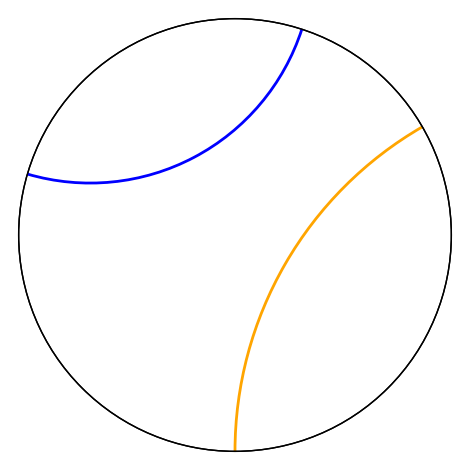

In [2]:
# Load the hyperbolic plane in the Poincaré Disc model
H = HyperbolicPlane().PD()

# Define two intersecting geodesics in the disc
g1 = H.get_geodesic(-I, exp(2 pi I / 12) )      # Geodesic connecting points inside the unit disc
g2 = H.get_geodesic(exp(2 pi I / 2.2), exp(2 pi I / 5))      # Another geodesic intersecting the first

#Plot all three geodesics
plot = g1.plot(color='orange', thickness=2) + \
g2.plot(color='blue', thickness=2) 
#g3.plot(color='red', linestyle='--', thickness=2)


plot.show()

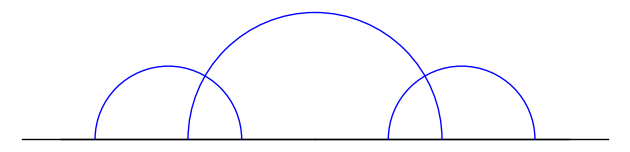

In [3]:
UHP = HyperbolicPlane().UHP()
g = UHP.get_geodesic(2, 3)
h = UHP.get_geodesic(4, 5)
perp = g.common_perpendicular(h)

g.plot() + h.plot() + perp.plot()

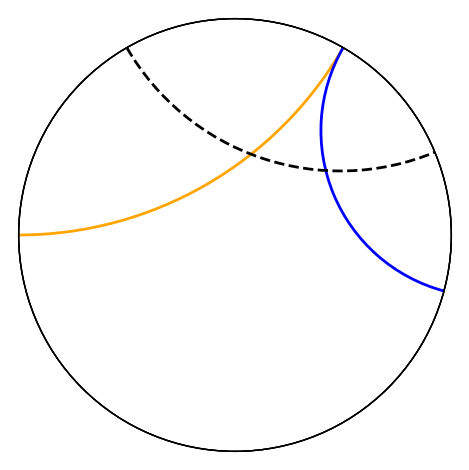

In [4]:
# Load the hyperbolic plane in the Poincaré Disc model
H = HyperbolicPlane().PD()
import cmath

# Step 1: Define two hyperbolic geodesics with endpoints on the boundary (non-intersecting)

tz1, tz2 = 2 pi I / 6, 2 pi I / 2
z1, z2 = exp(tz1), exp(tz2)

tw1, tw2 = 2 pi I / 6, -2 pi I/24
w1, w2 = exp(tw1), exp(tw2)

g1 = H.get_geodesic(z1, z2)
g2 = H.get_geodesic(w1, w2)


# Step 4: Create the common perpendicular geodesic
g3 = H.get_geodesic(exp((tz1 + tz2)/2), exp((tw1 + tw2)/2))

# Plot all three geodesics
plot = (
    g1.plot(color='orange', thickness=2, legend_label='g1') +
    g2.plot(color='blue', thickness=2, legend_label='g2') +
    g3.plot(color='red', linestyle='--', thickness=2, legend_label='common perpendicular')
)

#plot.show()
p = g1.plot(color="orange", thickness=2) + g2.plot(color="blue", thickness=2) + g3.plot(color="black", linestyle="--", thickness=2)
#p.save_image("Ultraparallel.svg")
p

In [5]:
# Load the hyperbolic plane in the Poincaré Disc model
H = HyperbolicPlane().PD()
import cmath

# Step 1: Define two hyperbolic geodesics with endpoints on the boundary (non-intersecting)

tz1, tz2 = 2 pi I / 6, 2 pi I / 2
z1, z2 = exp(tz1), exp(tz2)

tw1, tw2 = 2 pi I / 6, -2 pi I/24
w1, w2 = exp(tw1), exp(tw2)

g1 = H.get_geodesic(z1, z2)
g2 = H.get_geodesic(w1, w2)


# Step 4: Create the common perpendicular geodesic
#g3 = H.get_geodesic(exp(2 pi I/6), exp(2 pi I / 6.1) )
s=0.6
t=-1/2
g3 = line([ (1/2)*(1+3t) + I sqrt(3)/2 *(1-t), (1/2)*(1+3s) + I sqrt(3)/2 *(1-s) ], linestyle="--", color="black", thickness=2)


#plot.show()
p = g1.plot(color="orange", thickness=2) + g2.plot(color="blue", thickness=2) + g3.plot()
p.save_image("asymptotically_parallel.svg")
#p

In [6]:
g3[0].options()

{'alpha': 1,
 'rgbcolor': 'black',
 'thickness': 2,
 'legend_label': None,
 'legend_color': None,
 'linestyle': '--'}

In [ ]:
# Load the hyperbolic plane in the Poincaré Disc model
H = HyperbolicPlane().UHP()

# Step 1: Define two hyperbolic geodesics with endpoints on the boundary (non-intersecting)

g1 = H.get_geodesic(-1, 3)
g2 = H.get_geodesic(-3, -2)


# Step 4: Create the common perpendicular geodesic
#g3 = H.get_geodesic(exp(2 pi I/6), exp(2 pi I / 6.1) )
s=0.6
t=-1/2
#g3 = line([ (1/2)*(1+3t) + I sqrt(3)/2 *(1-t), (1/2)*(1+3s) + I sqrt(3)/2 *(1-s) ], linestyle="--", color="black", thickness=2)
g3 = line([0, 3 I], linestyle="--", alpha=0.2, color="black")

g4 = g1.common_perpendicular(g2)

a1c = g1.intersection(g4)[0].coordinates()

#a1 = arrow((a1c.real_part(), a1c.imag()), (a1c.real_part() - 0.7, a1c.imag() + 0.4), color="red", arrowsize=3)


p = g1.plot(color="orange", thickness=2, ymin=-0.2, xmin=-4, xmax=4) + g2.plot(color="blue", thickness=2) + g3.plot() + g4.plot(linestyle="--", color="black") #+ a1.plot()
p.save_image("ultraparallel_plane_model.svg")

In [ ]:
# Load the hyperbolic plane in the Poincaré Disc model
H = HyperbolicPlane().UHP()

# Step 1: Define two hyperbolic geodesics with endpoints on the boundary (non-intersecting)

g1 = H.get_geodesic(-3, 3)
g2 = H.get_geodesic(-3, 1)


# Step 4: Create the common perpendicular geodesic
#g3 = H.get_geodesic(exp(2 pi I/6), exp(2 pi I / 6.1) )
s=0.6
t=-1/2
#g3 = line([ (1/2)*(1+3t) + I sqrt(3)/2 *(1-t), (1/2)*(1+3s) + I sqrt(3)/2 *(1-s) ], linestyle="--", color="black", thickness=2)
g3 = line([0, 4 I], linestyle="--", alpha=0.2, color="black")
g4 = line([-3 -0.4 I, -3 + 4 I], linestyle="--", color="black")


#g4 = g1.common_perpendicular(g2)

a = arrow((-2, 0), (-3, 0), color="red", arrowsize=3)

p = g1.plot(color="orange", thickness=2, ymin=-0.2, xmin=-4, xmax=4) + g2.plot(color="blue", thickness=2) + g3.plot() +g4.plot() #+ a.plot() #+ g4.plot(linestyle="--", color="black") + 
p#.save_image("asymptotically_parallel_plane_model.svg")

In [ ]:
a = arrow((0, 0), (-1, 0), color="red")
a.plot()

In [ ]:

hyperbolic_triangle(exp(2 pi I/2), exp(2 pi I / 3), 1, model='PD', color='cyan', fill=True, resolution=200)


In [ ]:
print(plt.style.available)


In [ ]:
hyperbolic_triangle(
    -1,
    Infinity,
    1,
    fill=true,
    rgbcolor="#80DAEB",
    resolution=200,
    xmin=-2,
    xmax=2,
    ymax=3,
)


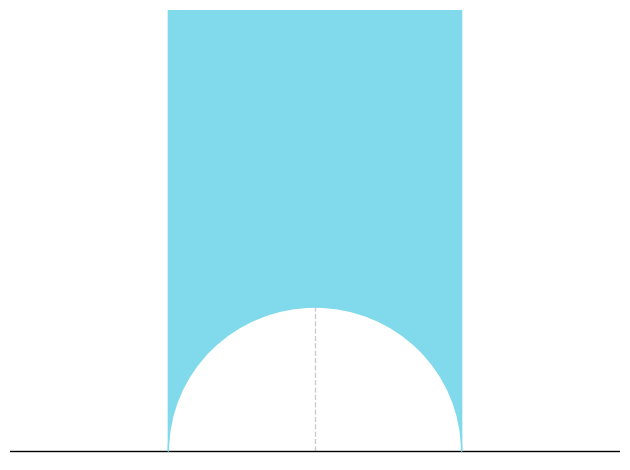

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-dark-palette')

tri = hyperbolic_triangle(-1, Infinity, 1, fill=true, rgbcolor='#80DAEB', resolution=200, xmin=-2, xmax=2, ymax=3, axes=False)
g4 = line([-3, 3], color="black", axes=False)
g5 = line([0, 5 I], color="black", axes=False, linestyle="--", alpha=0.2)

g4.axes(False)
g4.plot() + g5.plot() + tri.plot()

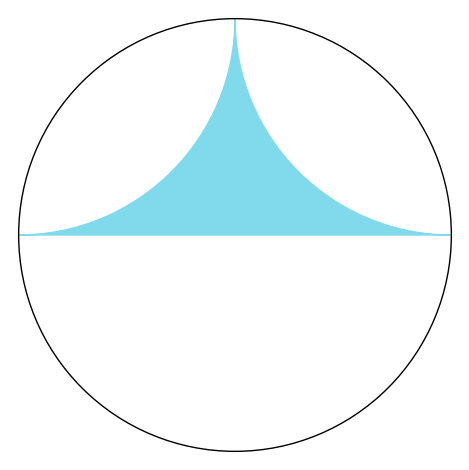

In [3]:
UHP = HyperbolicPlane().UHP()
PD = HyperbolicPlane().PD()
p1 = UHP.get_point(-1).to_model(PD)
p2 = UHP.get_point(1).to_model(PD)
p3 = UHP.get_point(Infinity).to_model(PD)

tri = hyperbolic_triangle(
    p1.coordinates(),
    p2.coordinates(),
    p3.coordinates(),
    model="PD",
    fill=True,
    rgbcolor="#80DAEB",
    axes=False,
)
tri

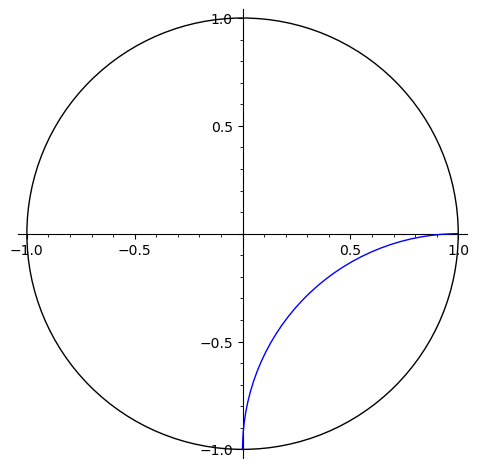

In [11]:
g1 = PD.get_geodesic(-1, I)
g2 = PD.get_geodesic(I, 1)
g3 = PD.get_geodesic(1, -1)
inv11 = g11.reflection_involution()
plot(inv11 * g2)

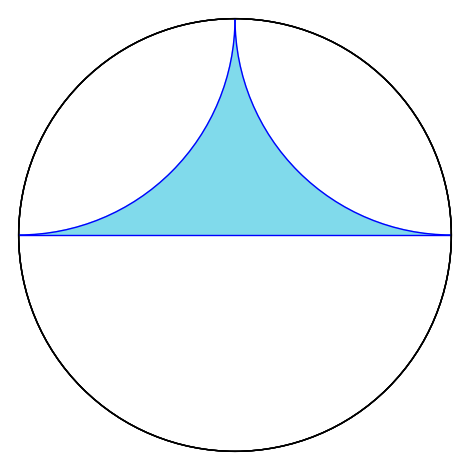

In [48]:
allpts = []
allgeos = []

p1 = UHP.get_point(-1).to_model(PD)
p2 = UHP.get_point(1).to_model(PD)
p3 = UHP.get_point(Infinity).to_model(PD)

allpts += [(p1, p2, p3)]

tri1 = hyperbolic_triangle(
    p1.coordinates(),
    p2.coordinates(),
    p3.coordinates(),
    model="PD",
    fill=True,
    rgbcolor="#80DAEB",
    axes=False,
)

inv11 = g11.reflection_involution()

g1 = PD.get_geodesic(p1.coordinates(), p2.coordinates(), color="blue", axes=False)
g2 = PD.get_geodesic(p2.coordinates(), p3.coordinates(), color="blue", axes=False)
g3 = PD.get_geodesic(p3.coordinates(), p1.coordinates(), color="blue", axes=False)

allgeos += [(g1, g2, g3)]

tri1 += g1.plot() + g2.plot() + g3.plot()

# tri2 = hyperbolic_triangle(inv11 * p1, inv11 * p2, inv11 * p3, model="PD", fill=True, rgbcolor="#80DAEB", axes=False)
# tri1.plot() + tri2.plot()

g1p = inv11 * g1
g2p = inv11 * g2
g3p = inv11 * g3

# ip1 = g1p.intersection(g2p)


# tri2 = hyperbolic_triangle(inv11 * p1, inv11 * p2, inv11 * p3, model="PD", fill=True, rgbcolor="#80DAEB", axes=False)
# tri1.plot() + (inv11 * g1).plot() + (inv11 *g2).plot() + (inv11 *g3).plot()
tri1

In [46]:
newpoints = list(
    Set(
        [
            g1p.start().coordinates(),
            g1p.end().coordinates(),
            g2p.start().coordinates(),
            g2p.end().coordinates(),
            g3p.start().coordinates(),
            g3p.end().coordinates(),
        ]
    )
)
newpoints

[1, -I, -1]

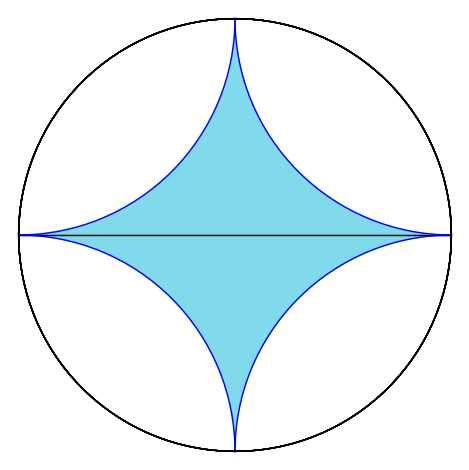

In [47]:
tri2 = hyperbolic_triangle(
    newpoints[0],
    newpoints[1],
    newpoints[2],
    model="PD",
    fill=True,
    rgbcolor="#80DAEB",
    axes=False,
)
tri1 += tri2 + g1p.plot() + g2p.plot() + g3p.plot()

tri1

In [111]:
g2.is_asymptotically_parallel(g3)

True

In [106]:

basealpha=1.0

def do_reflect(p1, p2, p3):
    global allpts
    global basealpha

    #basealpha = basealpha/1.5
    
    g1 = PD.get_geodesic(p1, p2, color="blue", axes=False)
    g2 = PD.get_geodesic(p2, p3, color="blue", axes=False)
    g3 = PD.get_geodesic(p3, p1, color="blue", axes=False)
    
    inv1 = g1.reflection_involution()
    inv2 = g2.reflection_involution()
    inv3 = g3.reflection_involution()

    g1p = inv1 * g1
    g2p = inv1 * g2
    g3p = inv1 * g3
    
    newpoints = tuple( Set([g1p.start().coordinates(), g1p.end().coordinates(), g2p.start().coordinates(), g2p.end().coordinates(), g3p.start().coordinates(), g3p.end().coordinates()]))
    allpts.append(newpoints)

    t1 = hyperbolic_triangle(newpoints[0],newpoints[1],newpoints[2], model="PD", fill=True, rgbcolor="#80DAEB", axes=False, alpha=basealpha, resolution=400)
    t1 += g1p.plot(color="blue", axes=False) + g2p.plot(color="blue", axes=False) + g3p.plot(color="blue", axes=False)

    g1p = inv2 * g1
    g2p = inv2 * g2
    g3p = inv2 * g3

    newpoints = tuple( Set([g1p.start().coordinates(), g1p.end().coordinates(), g2p.start().coordinates(), g2p.end().coordinates(), g3p.start().coordinates(), g3p.end().coordinates()]))
    allpts.append(newpoints)

    t2 = hyperbolic_triangle(newpoints[0],newpoints[1],newpoints[2], model="PD", fill=True, rgbcolor="#80DAEB", axes=False, alpha=basealpha, resolution=400)
    t2 += g1p.plot(color="blue", axes=False) + g2p.plot(color="blue", axes=False) + g3p.plot(color="blue", axes=False)

    g1p = inv3 * g1
    g2p = inv3 * g2
    g3p = inv3 * g3

    newpoints = tuple( Set([g1p.start().coordinates(), g1p.end().coordinates(), g2p.start().coordinates(), g2p.end().coordinates(), g3p.start().coordinates(), g3p.end().coordinates()]))
    allpts.append(newpoints)

    t3 = hyperbolic_triangle(newpoints[0],newpoints[1],newpoints[2], model="PD", fill=True, rgbcolor="#80DAEB", axes=False, alpha=basealpha, resolution=400)
    t3 += g1p.plot(color="blue", axes=False) + g2p.plot(color="blue", axes=False) + g3p.plot(color="blue", axes=False)

    return t1 + t2 + t3


p1 = UHP.get_point(-1).to_model(PD)
p2 = UHP.get_point(1).to_model(PD)
p3 = UHP.get_point(Infinity).to_model(PD)

allpts = [(p1.coordinates(), p2.coordinates(), p3.coordinates())]

a,b,c = allpts.pop(0)

g1 = PD.get_geodesic(a, b, color="blue", axes=False)
g2 = PD.get_geodesic(b, c, color="blue", axes=False)
g3 = PD.get_geodesic(c, a, color="blue", axes=False)

basealpha=1.0
tri1 = hyperbolic_triangle(a,b,c, model="PD", fill=True, rgbcolor="#80DAEB", axes=False, resolution=400, alpha=basealpha)
tri1 += g1.plot() + g2.plot() + g3.plot()
#show(tri1.plot())
tri1.save_image("tesselation_start.png")

basealpha=0.5
tri1 += do_reflect(a,b,c)
#show(tri1.plot())
tri1.save_image("tesselation_0.png")


basealpha=0.25
j = 1
i = 1
while true:
    print(i)
    if i in [3^n+1 for n in [1..10]]:
        basealpha = basealpha/5
        #show(tri1.plot())
        tri1.save_image(f'tesselation_{j}.png')
        j += 1
        if j >= 6:
            break
    a,b,c = allpts.pop(0)
    tri1 += do_reflect(a,b,c)
    i += 1
    if i % 100 == 0:
        print("i,", sep='')

#show(tri1.plot())
tri1.save_image(f'tesselation_end.png')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
i,
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
i,
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244


In [112]:
singular.lib("classify.lib")
r = singular.ring(0, "(x,y,z)", "ds")
f = singular.new("x^2 + y^2 + z^3")
print(singular.eval("classify({})".format(f.name())))

About the singularity :
          Milnor number(f)   = 2
          Corank(f)          = 1
          Determinacy       <= 3
Guessing type via Milnorcode:  A[2]

Computing normal form ...
   Arnold step number 2
The singularity
   x2+y2+z3
is R-equivalent to A[2].
   Milnor number = 2
   modality      = 0
y^2+z^2+x^3


In [115]:
var("x,y")
monomials([x, y], [4, 4])

[1,
 y,
 y^2,
 y^3,
 x,
 x*y,
 x*y^2,
 x*y^3,
 x^2,
 x^2*y,
 x^2*y^2,
 x^2*y^3,
 x^3,
 x^3*y,
 x^3*y^2,
 x^3*y^3]

In [1]:
x, y, z = PolynomialRing(GF(5), 3, "xyz").gens()
f = x ^ 7 + y ^ 7 + z ^ 7
X = Curve(f)
pts = X.rational_points()
D = X.divisor([(3, pts[0]), (-1, pts[1]), (10, pts[5])])
X.riemann_roch_basis(D)


[(-2*x + y)/(x + y), (-x + z)/(x + y)]

In [2]:
singular.LIB("brnoeth.lib")
_ = singular.ring(5, "(x,y)", "lp")
print(singular.eval("list X = Adj_div(-x5+y2+x);"))


Computing affine singular points ... 
Computing all points at infinity ... 
Computing affine singular places ... 
Computing singular places at infinity ... 
Computing non-singular places at infinity ... 
Adjunction divisor computed successfully
 
The genus of the curve is 2


In [4]:
x, y, z = ProjectiveSpace(2, GF(5), names="x,y,z").gens()
C = Curve(y ^ 2 * z ^ 7 - x ^ 9 - x * z ^ 8)
pts = C.rational_points()
pts
D1 = C.divisor(pts[0]) * 3
D2 = C.divisor(pts[1])


In [5]:
D1.

3*(x, y)

In [6]:
P2 = Proj(2, "k")
sage: P5 = Proj(5, "h")
sage: f = P2.hom(["2*k"], P5)
sage: g = Blowup(f)
sage: B = g.codomain()
sage: (e, h) = B.chowring().gens()
sage: ((6 * h - 2 * e) ^ 5).integral()


NameError: name 'Proj' is not defined

In [7]:
P2 = ChowScheme(2, "h", 1, "h^3")


NameError: name 'ChowScheme' is not defined

2-d CPR-Fano toric variety covered by 4 affine patches

In [15]:
HH = X.cohomology_ring()
K = X.K()
show(K)
show(X.integrate(HH(K) ^ 2))

-V(s) - V(t) - V(x) - V(y)

8

In [16]:
Kp = HH(K)
Kp.

[-2*t - 2*y]

In [17]:
X.dimension_singularities()

-1

In [19]:
X.coordinate_ring()
X.inject_variables()

Defining s, t, x, y


In [22]:
Z = X.subscheme([x * s + y * t, x ^ 3 + y ^ 3])
Z

Closed subscheme of 2-d CPR-Fano toric variety covered by 4 affine patches defined by:
  s*x + t*y,
  x^3 + y^3

In [23]:
Y = toric_varieties.P1xP1_Z2()
Y

2-d CPR-Fano toric variety covered by 4 affine patches

In [59]:
from sage.geometry.fan import *

e1 = vector([1, 0])
e2 = vector([0, 1])
# cone = Cone()
# fan = Fan([cone])
# X = ToricVariety(fan)
# X
Y = Fan2d([e1, e2, -e1, -e2], ZZ ^ 2)
# plot(Y)

In [74]:
P1 = Polyhedron(vertices=[[0, 0, 0], [0, 4, 0], [4, 0, 0], [4, 4, 0], [2, 2, 2]])
show(P1.plot())
len(P1.integral_points())

Graphics3d Object

35

In [100]:
points = [[0, 0, 0], [0, 4, 0], [4, 0, 0], [4, 4, 0], [2, 2, 2]]
# points = [ [0,0], [4,0], [0,4], [4,4]]
# p = LatticePolytope(points, lattice=(ZZ)^3)
# show( p.plot3d() )
# len( p.points() )

N = ToricLattice(3)
# Ns1 = N.submodule([N(2,0), N(0,2)])
Ns1 = N.submodule([N(2, 0, 0), N(0, 2, 0), N(0, 0, 2)])
p = LatticePolytope(points, lattice=Ns1)

ls = [((x[0], x[1], x[2]), sum(x) % 2) for x in p.points() if sum(x) % 2 == 0]
display(ls)
len(ls)

[((0, 0, 0), 0),
 ((0, 4, 0), 0),
 ((4, 0, 0), 0),
 ((4, 4, 0), 0),
 ((2, 2, 2), 0),
 ((0, 2, 0), 0),
 ((1, 1, 0), 0),
 ((1, 3, 0), 0),
 ((2, 0, 0), 0),
 ((2, 2, 0), 0),
 ((2, 4, 0), 0),
 ((3, 1, 0), 0),
 ((3, 3, 0), 0),
 ((4, 2, 0), 0),
 ((1, 2, 1), 0),
 ((2, 1, 1), 0),
 ((2, 3, 1), 0),
 ((3, 2, 1), 0)]

18

In [110]:
W = toric_varieties.P1xP1_Z2()
show(W.is_smooth())
show(W.defining_polynomials())
show(W.is_orbifold())
show(W.K())
K = W.K()
HH = X.cohomology_ring()
# dP6.integrate( HH(dP6.K())^2 )
show(X.integrate(HH(K) ^ 2))

False

()

True

-V(s) - V(t) - V(x) - V(y)

8

In [67]:
X = toric_varieties.P1xP1()
H = X.divisor(0)
# H.sections_monomials()
Ds, Dt, Dx, Dy = X.toric_divisor_group().gens()
Ds

V(s)

In [50]:
# See https://www.math.sciences.univ-nantes.fr/~sorger/en/chow/
from sage.schemes.chow.all import *

X = ChowScheme(6, ["c2", "c4", "c6"], [2, 4, 6])
td = Sheaf(X, 6, 1 + sum(X.gens())).todd_class()
(td._logg() / 2)._expp().by_degrees()[6]


31/967680*c2^3 - 11/241920*c2*c4 + 1/60480*c6

In [51]:
P2 = Proj(2, "k")
sage: P5 = Proj(5, "h")
sage: f = P2.hom(["2*k"], P5)
sage: g = Blowup(f)
sage: B = g.codomain()
sage: (e, h) = B.chowring().gens()
sage: ((6 * h - 2 * e) ^ 5).integral()


3264

In [52]:
B.chowring().gens()
(e, h)
sage: B.chowring().rels()
[h ^ 6, e * h ^ 3, e ^ 3 - 9 / 2 * e ^ 2 * h + 15 / 2 * e * h ^ 2 - 4 * h ^ 3]
sage: B.tangent_bundle().chern_classes()
[
    1,
    -2 * e + 6 * h,
    -15 / 2 * e * h + 15 * h ^ 2,
    9 / 2 * e ^ 2 * h - 93 / 4 * e * h ^ 2 + 28 * h ^ 3,
    27 / 4 * e ^ 2 * h ^ 2 + 27 * h ^ 4,
    12 * h ^ 5,
]
sage: B.betti_numbers()
[1, 2, 3, 3, 2, 1]
sage: B.tangent_bundle().chern_classes()[5].integral()  # The Euler number

In [53]:
H = Grass(5, 2)  # lines in P4
sage: Q = H.sheaves["universal_quotient"]
sage: Q.symm(5).chern_classes()[H.dimension()].integral()


2875

In [54]:
 G = Grass(5, 3)  # 2-planes in P4
sage: Q = G.sheaves["universal_quotient"]
sage: H = ProjBundle(Q.symm(2).dual())
sage: f = H.base_morphism()  # H -> G
sage: A = f.upperstar(Q.symm(5)) - f.upperstar(Q.symm(3)) * H.o(-1)
sage: A.chern_classes()[H.dimension()].integral()


609250